# Antal rum

In [1]:
import os
import glob

import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
from helpers import *

# Data prep

In [3]:
files = glob.glob('../indata/supermappen/*Antrumbas*.csv')

In [4]:
files

['../indata/supermappen/Tabell14G_Antrumbas2014.csv',
 '../indata/supermappen/Tabell14C_Antrumbas2016.csv',
 '../indata/supermappen/Tabell14I_Antrumbas2013.csv',
 '../indata/supermappen/Tabell14K_Antrumbas2012.csv',
 '../indata/supermappen/Tabell14E_Antrumbas2015.csv',
 '../indata/supermappen/Tabell14A_Antrumbas2017.csv']

In [5]:
def readAntrum(file):
    df = pd.read_csv(file, encoding='latin1' , sep=';', decimal=',', header=[0,1])
    df['year'] = pd.to_datetime(getYear(file))
    df['year'] = df['year'].apply(lambda t: t.year)
    return df

In [6]:
df = pd.concat(list(map(readAntrum, files)))

In [7]:
df.head()

Unnamed: 0_level_0    Småhus                        Flerbostadshus  \
           Basområde hyresrätt bostadsrätt äganderätt      hyresrätt   
0            1010110       0.0         0.0        0.0            1.8   
1            1010120       0.0         0.0        0.0            2.5   
2            1010130       2.8         3.0        0.0            2.5   
3            1010140       2.7         3.8        3.4            2.6   
4            1010201       0.0         0.0        0.0            0.0   

                         Specialbostad Övriga    Uppgift saknas  year  
  bostadsrätt äganderätt                      om upplåtelseform        
0         0.0        0.0           0.0    3.6               0.0  2014  
1         2.6        0.0           0.0    2.5               0.0  2014  
2         2.6        0.0           0.0    2.6               0.0  2014  
3         2.3        0.0           1.4    2.9               0.0  2014  
4         2.8        0.0           0.0    1.9               0.0  2014

In [8]:
df.columns = [' '.join(col).strip() for col in df.columns.values]

In [9]:
df.head()

,Unnamed: 0_level_0 Basområde,Småhus hyresrätt,Småhus bostadsrätt,Småhus äganderätt,Flerbostadshus hyresrätt,Flerbostadshus bostadsrätt,Flerbostadshus äganderätt,Specialbostad,Övriga,Uppgift saknas om upplåtelseform,year
0,1010110,0.0,0.0,0.0,1.8,0.0,0.0,0.0,3.6,0.0,2014
1,1010120,0.0,0.0,0.0,2.5,2.6,0.0,0.0,2.5,0.0,2014
2,1010130,2.8,3.0,0.0,2.5,2.6,0.0,0.0,2.6,0.0,2014
3,1010140,2.7,3.8,3.4,2.6,2.3,0.0,1.4,2.9,0.0,2014
4,1010201,0.0,0.0,0.0,0.0,2.8,0.0,0.0,1.9,0.0,2014


In [10]:
df = df.rename(columns={
    'Unnamed: 0_level_0 Basområde': 'BASKOD2010'
})

In [11]:
df.head()

,BASKOD2010,Småhus hyresrätt,Småhus bostadsrätt,Småhus äganderätt,Flerbostadshus hyresrätt,Flerbostadshus bostadsrätt,Flerbostadshus äganderätt,Specialbostad,Övriga,Uppgift saknas om upplåtelseform,year
0,1010110,0.0,0.0,0.0,1.8,0.0,0.0,0.0,3.6,0.0,2014
1,1010120,0.0,0.0,0.0,2.5,2.6,0.0,0.0,2.5,0.0,2014
2,1010130,2.8,3.0,0.0,2.5,2.6,0.0,0.0,2.6,0.0,2014
3,1010140,2.7,3.8,3.4,2.6,2.3,0.0,1.4,2.9,0.0,2014
4,1010201,0.0,0.0,0.0,0.0,2.8,0.0,0.0,1.9,0.0,2014


In [12]:
# list(df.columns)
df = df[['BASKOD2010', 'year', 'Småhus hyresrätt', 'Småhus bostadsrätt', 'Småhus äganderätt', 'Flerbostadshus hyresrätt', 'Flerbostadshus bostadsrätt', 'Flerbostadshus äganderätt', 'Specialbostad', 'Övriga', 'Uppgift saknas om upplåtelseform']]

In [13]:
# df.head()

In [15]:
df = baskod2010tobasomrade(df, n_numeric=9)#.drop(columns=['BASKOD2010', 'BASKOD2000'])

In [16]:
cols = ['Småhus hyresrätt','Småhus bostadsrätt','Småhus äganderätt','Flerbostadshus hyresrätt','Flerbostadshus bostadsrätt','Flerbostadshus äganderätt','Specialbostad','Övriga','Uppgift saknas om upplåtelseform']

df[cols] = df[cols].replace({0.0:np.nan})

In [17]:
df.head()

,year,basomrade,Småhus hyresrätt,Småhus bostadsrätt,Småhus äganderätt,Flerbostadshus hyresrätt,Flerbostadshus bostadsrätt,Flerbostadshus äganderätt,Specialbostad,Övriga,Uppgift saknas om upplåtelseform
0,2012,1010120_skeppsbron,NaN,NaN,NaN,2.5,2.6,NaN,NaN,2.5,NaN
1,2012,1010130_munkbron,2.8,3.0,NaN,2.6,2.6,NaN,NaN,2.6,NaN
2,2012,1010140_stortorget,2.7,3.8,3.4,2.6,2.3,NaN,1.4,2.9,NaN
3,2012,1010201_centralstationen_n,NaN,NaN,NaN,NaN,2.8,NaN,NaN,1.9,NaN
4,2012,1010220_klara_kyrka,NaN,NaN,NaN,2.5,3.5,NaN,NaN,NaN,NaN


# Antal rum per flerbostadshus, bostadsrätt

In [18]:
concept = 'n_rooms_multhab_owned'

In [19]:
subset = df[['Flerbostadshus bostadsrätt', 'year', 'basomrade']]
subset = subset.rename(columns={
    'Flerbostadshus bostadsrätt': 'value'
})

In [20]:
output = appendNewDatapoints(concept, subset, new=True)

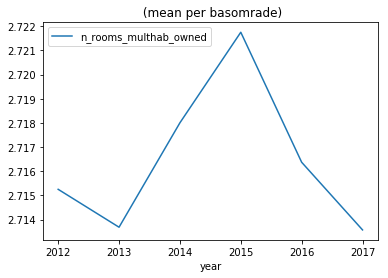

In [21]:
plotcombined(output, concept)

# Antal rum per småhus,  äganderätt

In [22]:
concept = 'n_rooms_small_house_owned'

In [23]:
subset = df[['Småhus äganderätt', 'year', 'basomrade']]
subset = subset.rename(columns={
    'Småhus äganderätt': 'value'
})

In [24]:
output = appendNewDatapoints(concept, subset, new=True)

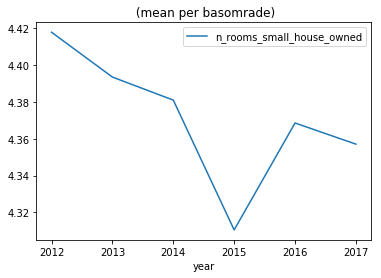

In [25]:
plotcombined(output, concept)

# Antal rum per flerbostadshus, hyresrätt

In [26]:
concept = 'n_rooms_multhab_rented'

In [27]:
subset = df[['Flerbostadshus hyresrätt', 'year', 'basomrade']]
subset = subset.rename(columns={
    'Flerbostadshus hyresrätt': 'value'
})

In [28]:
output = appendNewDatapoints(concept, subset, new=True)

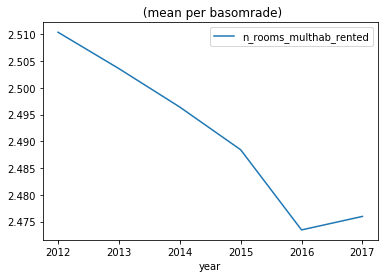

In [29]:
plotcombined(output, concept)